In [1]:
import numpy as np
import pandas as pd
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift

In [2]:
warnings.filterwarnings("ignore")

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

# Passos iniciais
</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## DataBase
</span>

In [3]:
df = pd.read_csv(
    '../data/mall/Mall_Customers.csv',
    sep = ',', encoding = 'iso-8859-1'
)

In [4]:
df.shape

(2000, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Atributos do DataFrame

- **CustomerID:** identificação do cliente.

- **Genre:** Gênero.

- **Age:** Idade.

- **Annual Income (k$):**	Rendimento anual.

- **Spending Score (1 a 100):** Pontuação de gastos.

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise Gráfica dos atributos
</span>

**Idade**

In [6]:
colors = px.colors.qualitative.Dark24_r
hist = px.histogram(
    df, x='Age', nbins=60, 
    labels={'Age': 'Idade', 'count': 'Número de Pessoas'},
    title='Distribuição das Idades',
    color_discrete_sequence=[colors[0]]
)
hist.update_layout(
    width=600, height=400, 
    xaxis_title='Idade',
    yaxis_title='Número de Pessoas',
    title_x=0.5, 
    margin=dict(l=50, r=50, t=50, b=50),
)
hist.show()

**Gênero**

In [7]:
df['Genre'].value_counts()

Genre
Female    1115
Male       885
Name: count, dtype: int64

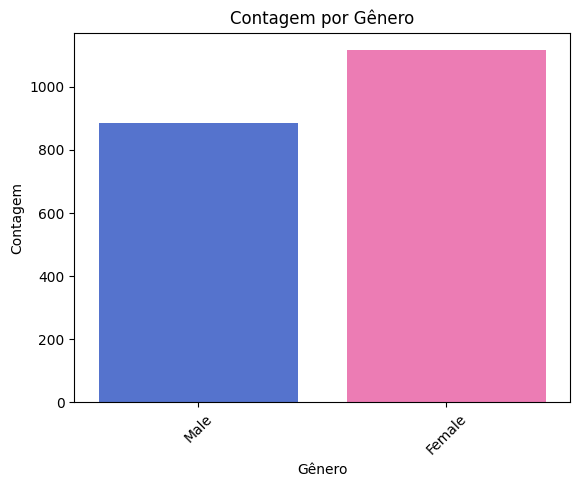

In [8]:
colors = {'Female': 'hotpink', 'Male': 'royalblue'}
sns.countplot(x='Genre', data=df, palette=colors)
plt.title('Contagem por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Exploração e tratamento dos dados

</span>

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Alterando nomes das colunas
</span>

In [9]:
df.rename(
    columns = {'CustomerID': 'ID'},
    inplace = True
)
df.rename(
    columns = {'Genre': 'genero'},
    inplace = True
)
df.rename(
    columns = {'Age': 'idade'},
    inplace = True
)
df.rename(
    columns = {'Annual Income (k$)': 'rendimento'},
    inplace = True
)
df.rename(
    columns = {'Spending Score (1-100)': 'pontuacao'},
    inplace = True
)

In [10]:
df.head(3)

,ID,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análises

</span>

**Valores Missing**

In [11]:
df.isnull().sum()

ID            0
genero        0
idade         0
rendimento    0
pontuacao     0
dtype: int64

**Tipos de atributos**

In [12]:
df.dtypes

ID             int64
genero        object
idade          int64
rendimento     int64
pontuacao      int64
dtype: object

**Dados Estatísticos**

In [13]:
df.describe()

,ID,idade,rendimento,pontuacao
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,600.495000,35.170000,74.71650,29.722500
std,305.580406,10.520097,33.21942,25.109535
min,1.000000,18.000000,13.00000,1.000000
25%,350.750000,26.000000,46.00000,10.000000
50%,600.500000,35.000000,75.00000,11.000000
75%,850.250000,44.000000,100.00000,50.000000
max,1200.000000,70.000000,146.00000,99.000000


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Análise dos Outliers
</span>

**Rendimento**

In [14]:
boxplot = px.box(
    df, y = "rendimento"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Idade**

In [15]:
boxplot = px.box(
    df, y = "idade"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

**Pontuação**

In [16]:
boxplot = px.box(
    df, y = "pontuacao"
)
boxplot.update_layout(
    width=600,  
    height=400,
)
boxplot.show()

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

## Pré-processamento
</span>

**Exluir identificação do cliente**

In [17]:
df_att = df.drop(labels = 'ID', axis = 1)

In [18]:
df_att.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Transformando variáveis categóricas em numéricas (encoder manual)
</span>

In [19]:
df_att['genero'].replace({
    'Female': 0,
    'Male': 1
}, inplace = True)

In [20]:
df_att.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

### Escalonamento
</span>

In [21]:
scale = StandardScaler()

In [22]:
df_esc = scale.fit_transform(df_att)

In [23]:
df_esc

array([[ 1.12244688, -1.53744251, -1.7980878 ,  0.36957356],
       [ 1.12244688, -1.34728265, -1.7980878 ,  2.04266326],
       [-0.89091075, -1.44236258, -1.7679774 , -0.94499691],
       ...,
       [-0.89091075, -0.49156325,  1.6947188 , -0.74581957],
       [ 1.12244688, -1.15712278,  1.7248292 , -0.86532597],
       [-0.89091075, -1.06204285,  1.7549396 , -0.82549051]])

<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif; font-weight: 100;">

# MeanShift

O Mean Shift Clustering é um algoritmo de clustering que é capaz de identificar clusters semelhantes ao DBSCAN, mas usando uma abordagem diferente. 

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190429213154/1354.png" alt="Descrição da imagem" width="500">
</br>

A ideia básica por trás do Mean Shift clustering é deslocar cada ponto de dados em direção ao modo (ou seja, a maior densidade) da distribuição de pontos dentro de um certo raio.  
O algoritmo realiza iterativamente esses deslocamentos até que os pontos convergem para um máximo local da função de densidade.     
**Esses máximos locais representam os clusters nos dados.** </br>

Dado um conjunto de pontos de dados, o algoritmo atribui iterativamente cada ponto de dados ao centroide do cluster mais próximo e a direção para o centroide do cluster mais próximo   
é determinada pelo local onde a maioria dos pontos próximos está. Assim, em cada iteração, cada ponto de dados se moverá mais perto de onde a maioria dos pontos está,  
o que é ou levará ao centro do cluster. Quando o algoritmo para, cada ponto é atribuído a um cluster.   
Ao contrário do popular algoritmo de cluster K-Means, o Mean Shift não requer a especificação do número de clusters com antecedência.
 O número de clusters é determinado pelo algoritmo em relação aos dados.

--- 

**Como Funciona o Mean Shift Clustering**

O Mean Shift Clustering é um algoritmo de clustering baseado em densidade que **não requer a especificação do número de clusters** a priori. Ele funciona da seguinte maneira:

1. Começa com uma janela de busca centrada em cada ponto de dados.

2. Calcula o centro de massa dos pontos de dados dentro da janela de busca.

3. Move a janela de busca para o novo centro de massa calculado e repete o processo até convergir para um ponto de máximo local.

4. Atribui cada ponto de dados ao cluster representado pelo ponto de máximo local onde convergiu.

---
**Parâmetros do Mean Shift Clustering**

O Mean Shift Clustering tem um parâmetro principal:

**Bandwidth (Largura de Banda)**: 
Define o tamanho da janela de busca ao redor de cada ponto de dados. Um valor maior de bandwidth resulta em uma janela de busca maior,    
o que pode levar a clusters maiores e menos clusters. Um valor menor de bandwidth pode resultar em clusters mais finos e mais numerosos.
    
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190508162515/anigif.gif" alt="Descrição da imagem" width="500">
</br>

**Abordagens comuns para encontrar o valor adequado para a largura de banda:**

- Validação Cruzada (**Cross-validation**): 
    - A validação cruzada é uma técnica comum para estimar a performance de um modelo ajustando os parâmetros do modelo em diferentes subconjuntos dos dados    
    e avaliando o desempenho em um conjunto de dados de validação separado. Você pode usar a validação cruzada para testar diferentes valores   
    de largura de banda e escolher aquele que maximiza uma métrica de avaliação, como a silhueta.

- Gráfico de Densidade (**Density plot**):
    - Você pode criar um gráfico de densidade dos dados usando diferentes valores de largura de banda e visualizar como a densidade     
    dos pontos varia em relação à largura de banda. 
    Escolha a largura de banda que resulta em uma distribuição de densidade suave e sem picos artificiais.

- Método Elbow (**Cotovelo**):
    - Você pode usar o método do cotovelo para escolher um valor de largura de banda que corresponda ao ponto de inflexão em um gráfico de métrica  
    de avaliação (por exemplo, silhueta) em função da largura de banda. Este método envolve calcular a métrica de avaliação para diferentes valores     
    de largura de banda e encontrar o ponto onde há uma mudança significativa na inclinação da curva.

- Heurística: 
    - Em alguns casos, o conhecimento do domínio ou a experiência prática podem ser úteis para escolher um valor inicial para a largura     
    de banda e ajustá-lo com base na observação dos resultados do clustering.

</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">
    
## MeanShift + PCA

</span>

In [24]:
pca = PCA(n_components = 2)

In [25]:
df_pca = pca.fit_transform(df_esc);

In [26]:
df_pca

array([[ 0.96133162, -0.38699117],
       [ 1.85106946,  0.41701816],
       [ 1.30154662, -1.46566991],
       ...,
       [-0.82746028, -1.35862001],
       [-1.88385317, -1.32332653],
       [-0.79236934, -1.87993492]])

In [27]:
mean_pca = MeanShift(
    bandwidth = 1, cluster_all = True
)

In [28]:
mean_pca.fit(df_pca);

In [29]:
classificacao_pca = mean_pca.labels_
classificacao_pca

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Gráfico
</span>

In [30]:
graf = px.scatter(
    x = df_pca[:, 0], y = df_pca[:, 1], color = classificacao_pca
)
graf.update_layout(width = 700, height = 400, title_text = 'Agrupamento MeanShift')
graf.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Agrupamento
</span>

In [31]:
agrupamento_pca = pd.DataFrame(classificacao_pca, columns = ['Grupo'])
agrupamento_pca

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
1995,0
1996,0
1997,0
1998,0


In [32]:
df_pca2 = pd.concat([df, agrupamento_pca], axis = 1)
df_pca2

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,0
1996,1197,Male,29,130,10,0
1997,1198,Female,30,131,11,0
1998,1199,Male,23,132,8,0


<span style="font-family: 'Trebuchet MS', sans-serif;">
    
## MeanShift com todos os atributos

</span>

In [65]:
mean_all = MeanShift(bandwidth = 1.4, cluster_all = True)

In [66]:
mean_all.fit(df_esc);

In [67]:
classificacao_all = mean_all.labels_

In [68]:
classificacao_all

array([3, 2, 1, ..., 1, 3, 1], dtype=int64)

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Agrupamento
</span>

In [69]:
agrupamento_all = pd.DataFrame(classificacao_all, columns = ['Grupo'])
agrupamento_all

,Grupo
0,3
1,2
2,1
3,2
4,2
...,...
1995,1
1996,3
1997,1
1998,3


In [70]:
df_all = pd.concat([df, agrupamento_all], axis = 1)
df_all

,ID,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
1995,1196,Female,28,129,9,1
1996,1197,Male,29,130,10,3
1997,1198,Female,30,131,11,1
1998,1199,Male,23,132,8,3
